Data processing complete -- Printing Quiver Animation


IndexError: list index out of range

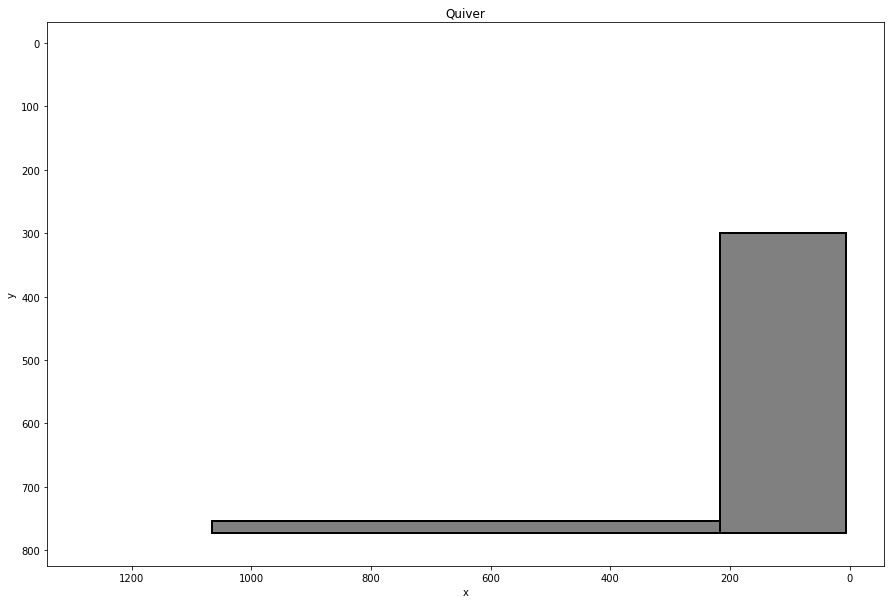

In [21]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.patches as patches
import matplotlib.cm as cm
import matplotlib.colors as colors

#Function to reset formatting after each frame
def init_func():
    
    ax1.clear()
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.invert_yaxis()
    ax1.invert_xaxis()
    ax1.add_patch(rectu_1)
    ax1.add_patch(rectl_1)
    ax1.set_title("Quiver")
    
#Function to animate plot with new after each frame
def update_plot(i):
    
    filenum = '{0:03}'.format(i+1)
    filepath = fileroot + fileprefix + filenum + fileext
    df = pd.read_csv (filepath, sep = " ") 
    shapedf= df.shape[1]

    #The textfiles are not clean and have trailing whitespaces at random files.
    #This if statement will catch the extra whitespace discrepansy in this specific data set and drop columns.
    if shapedf == 5:
        df.drop((df.columns)[[-1,-1]],axis=1,inplace=True)
    elif shapedf == 6:
        df.drop((df.columns)[[-1,-2]],axis=1,inplace=True)

    #Drop last to columns
    df.drop(index=df.index[0:106],inplace=True) #Dropping remaining data to keep reshape intervals constant

    #Append column names
    df.columns = ["x","y","u","v"]
    
    #Flip Orientation of u and v velocity vectors
    df['u']= df['u']*-1
    df['v']= df['v']*-1
    
    #Clear Previous Quiver Object
    for obj in ax1.findobj(match = type(plt.quiver(df['x'],df['y'],df['u'],df['v']))):
        obj.remove()
        
    #Add Updated Quiver Instance
    ax1.quiver(df['x'],df['y'],df['u'],df['v'],cmap=('coolwarm'),norm=colors.LogNorm(vmin=u.min(),vmax=u.max()))

    ax1.set_xlim(1100,120)
    ax1.set_ylim(774,0)

    title_str = "Frame:" + filenum                             
    plt.title(title_str)

########################################################     

    
#Reading in PIV Vector Data
fileroot = f'{sys.path[0]}/V20_front_01run/PLT_WS24/'
fileprefix = 'B00'
fileext = '.plt'
total_frames=50
print('Data processing complete -- Printing Quiver Animation')

#Creating Animation
#Initialise figure to prepare for animation function
fig, ((ax1)) = plt.subplots(nrows=1, ncols=1,figsize = (15,10))

rectu_1 = patches.Rectangle((6, 300), 210, 474, linewidth=2, edgecolor='black', facecolor='grey')
rectl_1 = patches.Rectangle((216, 754), 850, 20, linewidth=2, edgecolor='black', facecolor='grey')

anim = animation.FuncAnimation(fig,update_plot,frames = total_frames, init_func = init_func)        

#Writing animation to gif file
f = f'{sys.path[0]}/results/piv-front-quiver.gif'
writergif = animation.PillowWriter(fps=12) 
anim.save(f, writer=writergif)
